In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [5]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


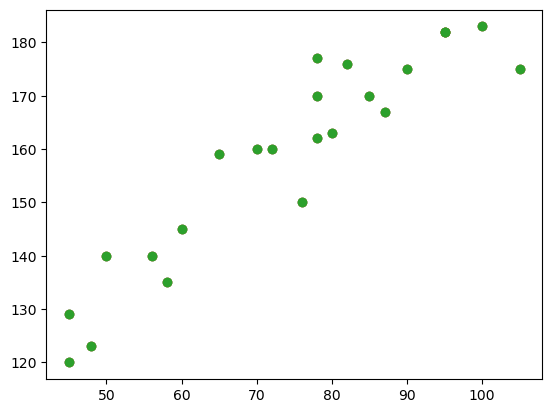

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.show()

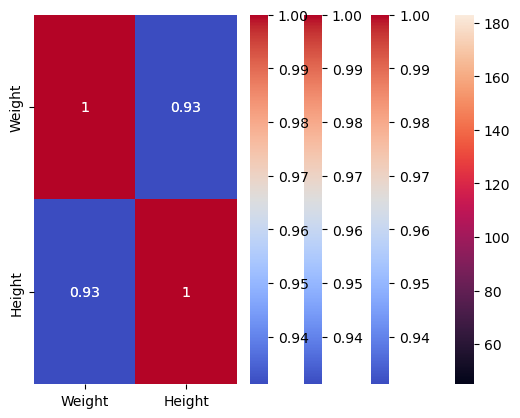

In [14]:
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

In [ ]:
#dependend and Independent variables
X=df[['Weight']]
Y=df['Height']
X.shape
Y.shape

(23,)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(17, 1)

In [18]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

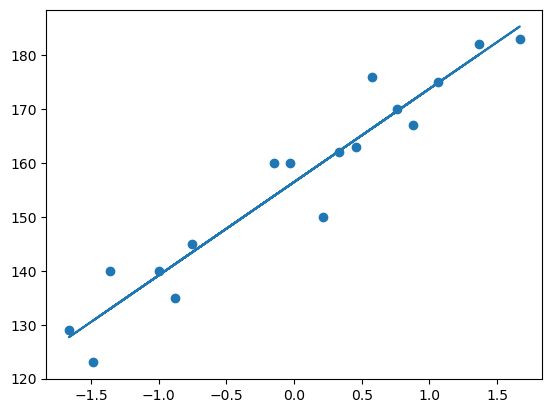

In [20]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [21]:
Y_pred=regression.predict(X_test)

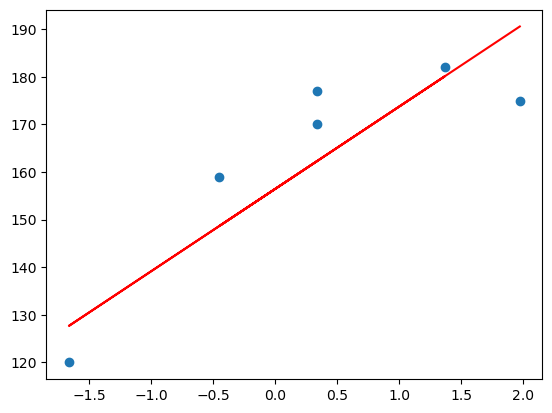

In [22]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='red')
plt.show()

In [26]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,Y_pred)
print(mse)
print(mae)
print(rmse)
print(score)

114.84069295228699
9.665125886795005
10.716374991212605
0.7360826717981276


In [28]:
#OLS LINEAR REGRESSION
import statsmodels.api as sm
model=sm.OLS(X_train,Y_train).fit()
predict=model.predict(X_test)


In [29]:
predict

array([ 0.00023357,  0.00023357, -0.0011604 ,  0.00095167, -0.00031557,
        0.00137409])

In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 07 Feb 2026   Prob (F-statistic):                       0.664
Time:                        18:02:34   Log-Likelihood:                         -24.019
No. Observations:                  17   AIC:                                      50.04
Df Residuals:                      16   BIC:                                      50.87
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [33]:
#for new data 
regression.predict(scaler.transform([[90]]))

d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([174.84009753])